In [1]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 200 kB 57.4 MB/s 
     |████████████████████████████████| 199 kB 13.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=939e783c0b24cd2af386a9b941f63dc483b4ae76e98e7ef9ac66345332097d07
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
#Importing the Libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import datetime
from google.colab import drive
from pyspark.sql import functions as F
from pyspark.sql.functions import explode
from pyspark.sql.functions import split
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Mounting the Directory to access the required files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!curl -L -o "drive/Shareddrives/603Project/jars/graphframes-0.8.2-spark3.2-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  242k  100  242k    0     0   896k      0 --:--:-- --:--:-- --:--:--  896k


In [9]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame

In [10]:
spark = SparkSession.builder.master("local[*]").config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12").getOrCreate()

In [11]:
vertices = spark.createDataFrame([('1', 'Carter', 'Derrick', 50), 
                                  ('2', 'May', 'Derrick', 26)],
                                 ['id', 'name', 'firstname', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'), 
                               ('2', '1', 'friend')],
                              ['src', 'dst', 'type'])
g = GraphFrame(vertices, edges)

In [5]:

conf = SparkConf()

# Download mongo-spark-connector and its dependencies.

conf.set("spark.jars.packages","graphframes:graphframes:0.8.0-spark3.0-s_2.12")

SparkContext.getOrCreate(conf=conf)
#Initializing Spark Session
spark = SparkSession.builder.appName("myApp").getOrCreate()


In [36]:
import sys
sys.path.append("drive/Shareddrives/603Project/jars")

## Generate a new RDD containing few selected US airport information

1.  Generate a new RDD containing few selected US airport information, such as: (“BWI”, “Baltimore Washington Airport”, “JFK”, “NYC Airport”, “MIA”, “Miami Airport”, “LAX”, “Los Angeles Airport”, etc.)
2.  Limit your airport selection to 10 airports


In [12]:
rdd=spark.sparkContext.parallelize(["BWI","JFK","ATL","MDW","CLT","BDL","BHM","GGG","LFT","OMA","PSG"])
rddAirports = rdd.collect()

print(rddAirports)


['BWI', 'JFK', 'ATL', 'MDW', 'CLT', 'BDL', 'BHM', 'GGG', 'LFT', 'OMA', 'PSG']


3. Generate random data for flights between two random airports (selected from the RDD above). Random data generated can be in the form (src, dst, flight number), (“BWI”, “LAX”, “1552”), etc.
4. You may use similar algorithm from the previous homework, make sure you generate 200+ flights (if you have a randomize function that generates one flight data information, then call the function 200 times)

In [13]:
def random_data_generation(airports_list):
  i=0
  src=[]
  dst=[]
  flight_number=[]

  while i < 200:
    for_src = random.choice(airports_list)
    src.append(for_src)
    j = 0
    while j <10:
       for_dst=random.choice(airports_list)
       if for_dst != for_src:
            dst.append(for_dst)
            break
       j=j+1
       
    flight_number.append(str(random.randint(1100,1200)))
    i=i+1
  return src, dst, flight_number



In [14]:
src, dst, flight_number = random_data_generation(rddAirports)

In [15]:
# specify column names
columns = ['src', 'dst','flight number']
  
# creating a dataframe by zipping the two lists
dataframe = spark.createDataFrame(zip(src, dst,flight_number), columns)
  

In [33]:
ver = dataframe
ver.printSchema()


v = ver.drop("dst","flight number")

vertices= v.withColumnRenamed('src', 'id').distinct()
vertices.show()

root
 |-- src: string (nullable = true)
 |-- dst: string (nullable = true)
 |-- flight number: string (nullable = true)

+---+
| id|
+---+
|PSG|
|CLT|
|BDL|
|BWI|
|BHM|
|ATL|
|OMA|
|LFT|
|MDW|
|GGG|
|JFK|
+---+



In [34]:
edges = dataframe

5.  Generate the relationship graph

In [35]:
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx

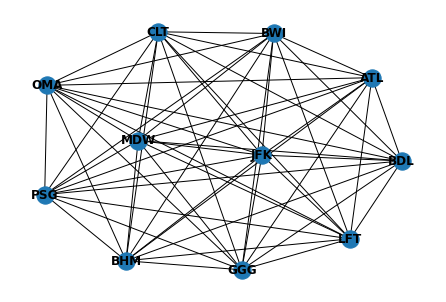

In [36]:
Gplot = nx.Graph()
for row in edges.select('src','dst').take(200):
  Gplot.add_edge(row['src'],row['dst'])

nx.draw(Gplot, with_labels = True, font_weight='bold')

6. Find the airport with the largest number of departure flight
7. Find the airport with the largest number of arriving flight
8. Find the busiest airport
Note: Illustrate your work and display your results (to get full grade)


In [37]:
import graphframes
from graphframes import GraphFrame

In [38]:
g = GraphFrame(vertices, edges)
g.vertices.show()
g.edges.show()

+---+
| id|
+---+
|PSG|
|CLT|
|BDL|
|BWI|
|BHM|
|ATL|
|OMA|
|LFT|
|MDW|
|GGG|
|JFK|
+---+

+---+---+-------------+
|src|dst|flight number|
+---+---+-------------+
|OMA|JFK|         1145|
|ATL|BHM|         1162|
|LFT|BWI|         1121|
|CLT|LFT|         1144|
|GGG|ATL|         1114|
|MDW|OMA|         1110|
|CLT|GGG|         1124|
|MDW|PSG|         1107|
|BWI|GGG|         1169|
|OMA|CLT|         1149|
|BWI|OMA|         1177|
|BDL|BWI|         1101|
|ATL|PSG|         1193|
|LFT|BWI|         1164|
|ATL|LFT|         1168|
|PSG|CLT|         1199|
|JFK|GGG|         1128|
|ATL|PSG|         1159|
|JFK|ATL|         1165|
|BWI|ATL|         1106|
+---+---+-------------+
only showing top 20 rows



In [43]:
departures = g.outDegrees
dep_lst = departures.sort(departures.outDegree.desc()).collect()
dep_lst

[Row(id='BWI', outDegree=24),
 Row(id='OMA', outDegree=23),
 Row(id='ATL', outDegree=22),
 Row(id='MDW', outDegree=21),
 Row(id='BDL', outDegree=20),
 Row(id='LFT', outDegree=19),
 Row(id='CLT', outDegree=17),
 Row(id='PSG', outDegree=15),
 Row(id='JFK', outDegree=14),
 Row(id='GGG', outDegree=13),
 Row(id='BHM', outDegree=12)]

In [42]:
arrivals = g.inDegrees
arr_lst = arrivals.sort(arrivals.inDegree.desc()).collect()
arr_lst

[Row(id='OMA', inDegree=27),
 Row(id='BHM', inDegree=21),
 Row(id='PSG', inDegree=20),
 Row(id='CLT', inDegree=18),
 Row(id='BWI', inDegree=18),
 Row(id='ATL', inDegree=18),
 Row(id='LFT', inDegree=18),
 Row(id='MDW', inDegree=18),
 Row(id='GGG', inDegree=16),
 Row(id='JFK', inDegree=16),
 Row(id='BDL', inDegree=10)]

In [45]:
max_routes = g.degrees
max_routes_lst = max_routes.sort(max_routes.degree.desc()).collect()
max_routes_lst

[Row(id='OMA', degree=50),
 Row(id='BWI', degree=42),
 Row(id='ATL', degree=40),
 Row(id='MDW', degree=39),
 Row(id='LFT', degree=37),
 Row(id='PSG', degree=35),
 Row(id='CLT', degree=35),
 Row(id='BHM', degree=33),
 Row(id='BDL', degree=30),
 Row(id='JFK', degree=30),
 Row(id='GGG', degree=29)]

In [49]:
print("Airport with the largest number of departure flight: ", dep_lst[0] )
print("Airport with the largest number of arriving flight: ", arr_lst[0] )
print("Busiest airport : ", max_routes_lst[0] )


Airport with the largest number of departure flight:  Row(id='BWI', outDegree=24)
Airport with the largest number of arriving flight:  Row(id='OMA', inDegree=27)
Busiest airport :  Row(id='OMA', degree=50)
